In [1]:
from platform import python_version

print(python_version())

3.9.7


In [2]:
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('Products.xlsx')
df

,Number,Category,Title,Price,Number_of_ratings,Avg_rating,5,4,3,2,1
0,1,Mobile,"SAMSUNG Galaxy F12 (Sea Green, 64 GB)",9499,96387,4.2,53481,24206,9436,3161,6103
1,2,Mobile,"APPLE iPhone 12 Mini (Black, 64 GB)",40999,12638,4.6,10094,1565,312,136,531
2,3,Mobile,"realme C21Y (Cross Blue, 64 GB)",8999,23277,4.5,17470,3211,1160,499,937
3,4,Mobile,"REDMI 9 Power (Blazing Blue, 64 GB)",12955,171541,4.3,104003,39488,13935,4616,9499
4,5,Mobile,"POCO M3 (Cool Blue, 64 GB)",10249,52164,4.3,31816,12178,4220,1246,2704
5,6,Laptop,APPLE MacBook Air M1 - (8 GB/256 GB SSD/Mac OS...,82990,1962,4.7,1656,210,34,10,52
6,7,Laptop,HP 14q APU Dual Core A9 A9-9425 - (4 GB/256 GB...,28462,12973,4.1,6718,3251,1480,552,972
7,8,Laptop,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,40000,2470,4.4,1569,596,136,31,138
8,9,Laptop,ASUS VivoBook 15 Core i3 7th Gen - (4 GB/1 TB ...,28990,6764,4.0,3040,1955,871,301,597
9,10,Laptop,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,49990,1395,4.4,892,341,78,19,65


In [4]:
df['Satisfaction Ratio']=(df['5']+df['4'])/(df['Number_of_ratings'])
df.head()

,Number,Category,Title,Price,Number_of_ratings,Avg_rating,5,4,3,2,1,Satisfaction Ratio
0,1,Mobile,"SAMSUNG Galaxy F12 (Sea Green, 64 GB)",9499,96387,4.2,53481,24206,9436,3161,6103,0.805990
1,2,Mobile,"APPLE iPhone 12 Mini (Black, 64 GB)",40999,12638,4.6,10094,1565,312,136,531,0.922535
2,3,Mobile,"realme C21Y (Cross Blue, 64 GB)",8999,23277,4.5,17470,3211,1160,499,937,0.888474
3,4,Mobile,"REDMI 9 Power (Blazing Blue, 64 GB)",12955,171541,4.3,104003,39488,13935,4616,9499,0.836482
4,5,Mobile,"POCO M3 (Cool Blue, 64 GB)",10249,52164,4.3,31816,12178,4220,1246,2704,0.843379


In [5]:
df2=df[['Category','Price','Satisfaction Ratio']]
df2

,Category,Price,Satisfaction Ratio
0,Mobile,9499,0.805990
1,Mobile,40999,0.922535
2,Mobile,8999,0.888474
3,Mobile,12955,0.836482
4,Mobile,10249,0.843379
5,Laptop,82990,0.951070
6,Laptop,28462,0.768442
7,Laptop,40000,0.876518
8,Laptop,28990,0.738468
9,Laptop,49990,0.883871


In [12]:
df3=df2.groupby(['Category']).mean()
print(df3.to_latex(index=True))

\begin{tabular}{lrr}
\toprule
{} &    Price &  Satisfaction Ratio \\
Category        &          &                     \\
\midrule
Baby Products   &    363.8 &            0.873259 \\
Book            &    194.0 &            0.899525 \\
Bottles         &    380.4 &            0.796474 \\
Groceries       &    298.4 &            0.848688 \\
Gym             &    521.6 &            0.696791 \\
Home Furnishing &    335.8 &            0.763301 \\
Laptop          &  46086.4 &            0.843674 \\
Mobile          &  16540.2 &            0.859372 \\
Sports          &    371.8 &            0.748296 \\
Tools           &   1497.2 &            0.781868 \\
\bottomrule
\end{tabular}



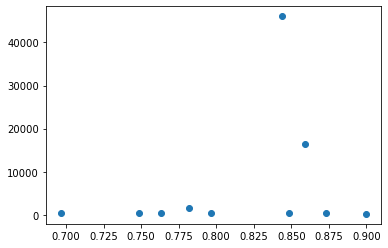

In [7]:
plt.scatter(y=df3['Price'],x=df3['Satisfaction Ratio'])
plt.show()

In [8]:
stat, p = ttest_rel(df3['Price'],df3['Satisfaction Ratio'] )
print('p=%.5f' % (p))
if p > 0.05:
	print('Same distribution')
else:
	print('Different distributions')

p=0.18713
Same distribution
